<a href="https://colab.research.google.com/github/Hsuyeon01/ESAA/blob/main/keras2_(1203_%EA%B3%BC%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 06. 모델 저장 및 불러오기

In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 모델 인스턴스 생성
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # 노드 10개 생성 
]) 
   
model.compile(tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 텐서보드 저장 경로 지정 
log_dir = 'tensorboard'

# 텐서보드 콜백 정의
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(x_train, y_train, validation_data=(x_test, y_test),
          epochs=10, callbacks=[tensorboard])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5947 - accuracy: 0.8310 - val_loss: 0.2963 - val_accuracy: 0.9162
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2496 - accuracy: 0.9270 - val_loss: 0.2150 - val_accuracy: 0.9348
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1935 - accuracy: 0.9438 - val_loss: 0.1789 - val_accuracy: 0.9452
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1583 - accuracy: 0.9537 - val_loss: 0.1524 - val_accuracy: 0.9534
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1343 - accuracy: 0.9606 - val_loss: 0.1364 - val_accuracy: 0.9593
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1156 - accuracy: 0.9663 - val_loss: 0.1179 - val_accuracy: 0.9644
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1013 - accuracy: 0.9708 - val_loss: 0.1061 - val_accuracy:

### 6-1) 모델을 파일로 저장

In [ ]:
# 모델을 h5 포멧으로 저장
model.save('h5-model.h5')

### 6-2) 저장된 모델 복원

In [ ]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.09164, acc: 0.97230


In [ ]:
# 모델을 SavedModel 포맷으로 저장 (.h5 확장자 생략하면 됨)
model.save('saved-model')

In [ ]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 검증 (HDFS 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증 (SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.09164, acc: 0.97230
saved_model] loss: 0.09164, acc: 0.97230


## 07. 복잡한 모델 생성

### 7-1) 함수형 API(Functional API)

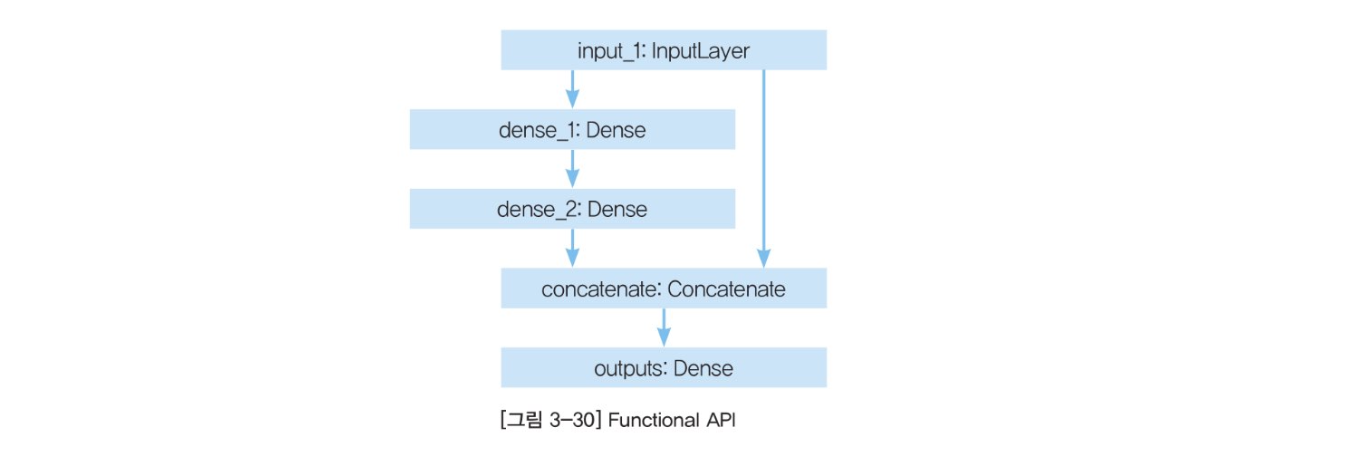

- Sequential API : 단방향의 Sequential 모델만 구현 가능
- Funcional API : 함수의 입력 매개변수를 여러 개 갖는 다중 입력, 함수의 return 값을 여러 개 갖는 다중 출력, 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조도 가능

In [ ]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28,28), name='InputLayer')


# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [ ]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


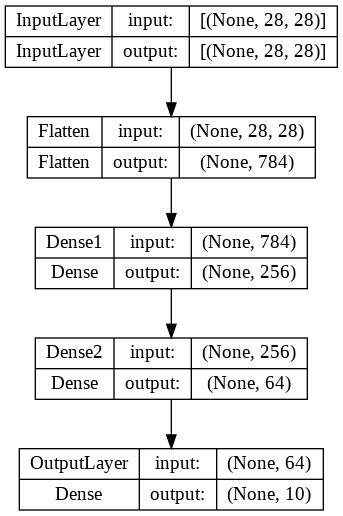

In [ ]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes = True, # 데이터의 입출력 Shape 출력
           show_layer_names = True, # 레이어의 이름 출력
           to_file='model.png') # 이미지 파일로 저장도 가능

In [ ]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2141 - accuracy: 0.9362
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0870 - accuracy: 0.9728
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0602 - accuracy: 0.9806
Functional model] loss: 0.07569, acc: 0.97660


### 7-2) 모델 서브클래싱 (Model Subclassing)

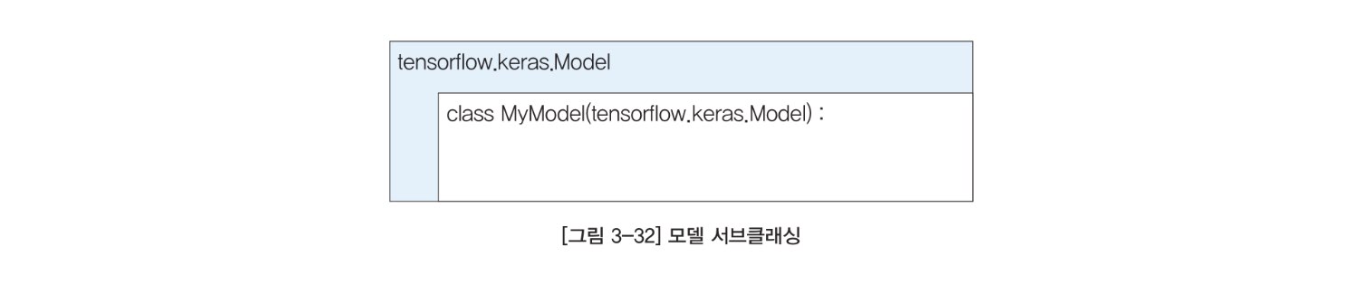

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

  # method overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [ ]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_16 (Dense)            multiple                  200960    
                                                                 
 dense_17 (Dense)            multiple                  16448     
                                                                 
 dense_18 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
# 모델 검증 (HDFS 포맷)
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2145 - accuracy: 0.9372
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0884 - accuracy: 0.9732
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0605 - accuracy: 0.9809
Subclassing Model] loss: 0.10739, acc: 0.96720


### 7-3) 서브클래싱 모델 파라미터를 활용한 생성

In [ ]:
class MyModel(tf.keras.Model):
  # 생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(units, activation='relu')
    self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

  # class overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [ ]:
# 모델 생성
mymodel = MyModel(256,10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "my_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_19 (Dense)            multiple                  200960    
                                                                 
 dense_20 (Dense)            multiple                  16448     
                                                                 
 dense_21 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
# 모델 검증 (HDFS 포맷)
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2161 - accuracy: 0.9362
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0900 - accuracy: 0.9723
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0607 - accuracy: 0.9808
Subclassing Model] loss: 0.09024, acc: 0.97400
